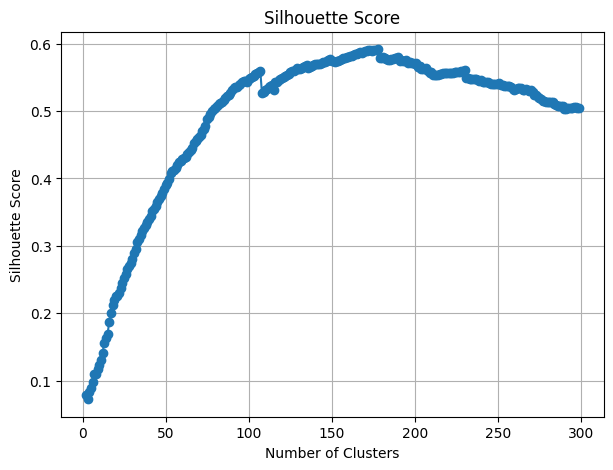

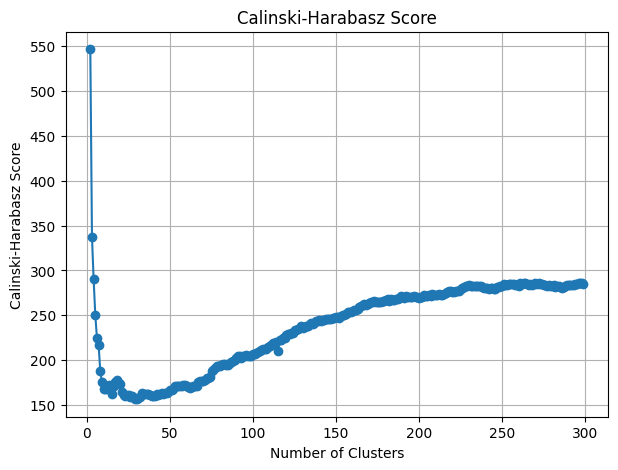

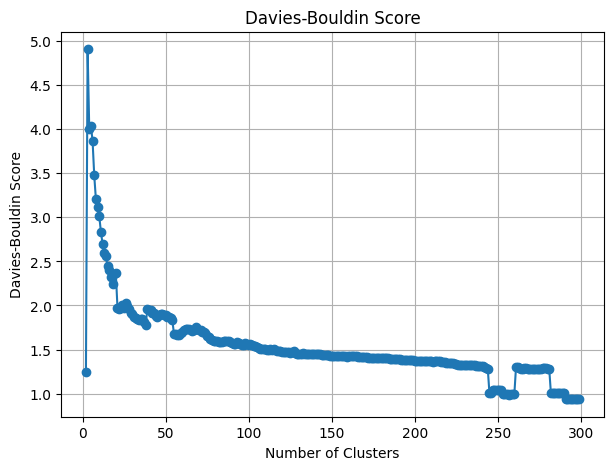

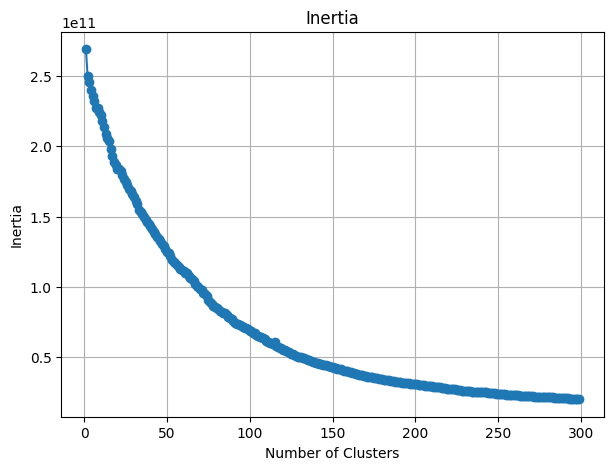

In [15]:
import json
import matplotlib.pyplot as plt

# Assuming the JSON data is saved in a file named 'data.json'
json_file_path = '/Users/jedrzejkurzepa/Projects/EBSD_analyze_app/output_data/clustering_results_final.json'

# Load JSON data from the file
with open(json_file_path, 'r') as file:
    data = json.load(file)  # Use json.load instead of json.loads for file objects

# Extract metrics
n_clusters = [entry['n_clusters'] for entry in data]
silhouette_scores = [entry['silhouette_score'] for entry in data]
calinski_harabasz_scores = [entry['calinski_harabasz_score'] for entry in data]
davies_bouldin_scores = [entry['davies_bouldin_score'] for entry in data]
inertia = [entry['inertia'] for entry in data]

# Filter out None values
filtered_silhouette_scores = [(n, score) for n, score in zip(n_clusters, silhouette_scores) if score is not None]
filtered_calinski_harabasz_scores = [(n, score) for n, score in zip(n_clusters, calinski_harabasz_scores) if score is not None]
filtered_davies_bouldin_scores = [(n, score) for n, score in zip(n_clusters, davies_bouldin_scores) if score is not None]
filtered_inertia = [(n, score) for n, score in zip(n_clusters, inertia) if score is not None]

# Separate the filtered values back into two lists
n_clusters_silhouette, silhouette_scores_filtered = zip(*filtered_silhouette_scores)
n_clusters_calinski, calinski_harabasz_scores_filtered = zip(*filtered_calinski_harabasz_scores)
n_clusters_davies, davies_bouldin_scores_filtered = zip(*filtered_davies_bouldin_scores)
n_clusters_inertia, inertia_filtered = zip(*filtered_inertia)

# Plot Silhouette Score
plt.figure(figsize=(7, 5))
plt.plot(n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.savefig('silhouette_score.pdf')  # Save plot as PDF
plt.savefig('silhouette_score.svg')  # Save plot as SVG
plt.show()

# Plot Calinski-Harabasz Score
plt.figure(figsize=(7, 5))
plt.plot(n_clusters, calinski_harabasz_scores, marker='o')
plt.title('Calinski-Harabasz Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.grid(True)
plt.savefig('calinski_harabasz_score.pdf')  # Save plot as PDF
plt.savefig('calinski_harabasz_score.svg')  # Save plot as SVG
plt.show()

# Plot Davies-Bouldin Score
plt.figure(figsize=(7, 5))
plt.plot(n_clusters, davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.grid(True)
plt.savefig('davies_bouldin_score.pdf')  # Save plot as PDF
plt.savefig('davies_bouldin_score.svg')  # Save plot as SVG
plt.show()

# Plot Inertia
plt.figure(figsize=(7, 5))
plt.plot(n_clusters, inertia, marker='o')
plt.title('Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.savefig('inertia.pdf')  # Save plot as PDF
plt.savefig('inertia.svg')  # Save plot as SVG
plt.show()

In [14]:
# Determine optimal number of clusters based on each metric
optimal_silhouette = n_clusters_silhouette[silhouette_scores_filtered.index(max(silhouette_scores_filtered))]
optimal_calinski_harabasz = n_clusters_calinski[calinski_harabasz_scores_filtered.index(max(calinski_harabasz_scores_filtered))]
optimal_davies_bouldin = n_clusters_davies[davies_bouldin_scores_filtered.index(min(davies_bouldin_scores_filtered))]
optimal_inertia = n_clusters_inertia[inertia_filtered.index(min(inertia_filtered))]

# Print summary of optimal number of clusters
print(f"Optimal number of clusters based on Silhouette Score: {optimal_silhouette}")
print(f"Optimal number of clusters based on Calinski-Harabasz Score: {optimal_calinski_harabasz}")
print(f"Optimal number of clusters based on Davies-Bouldin Score: {optimal_davies_bouldin}")
print(f"Optimal number of clusters based on Inertia: {optimal_inertia}")

Optimal number of clusters based on Silhouette Score: 178
Optimal number of clusters based on Calinski-Harabasz Score: 2
Optimal number of clusters based on Davies-Bouldin Score: 299
Optimal number of clusters based on Inertia: 299
